In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
!pip install earthpy gdal seaborn geopandas rasterio

     |████████████████████████████████| 1.4MB 5.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 972kB 24.1MB/s 
     |████████████████████████████████| 18.1MB 178kB/s 
     |████████████████████████████████| 10.9MB 25.1MB/s 
     |████████████████████████████████| 14.8MB 117kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365088 sha256=6f61ddde8cc51f516e11c656b79a57a2f1a89a8660ab7ab5cb245b1453a2de66
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [19]:
from glob import glob
import os
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import patches as mpatches
from matplotlib.colors import ListedColormap
from matplotlib import colors
import matplotlib as mpl
import seaborn as sns

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import gdal 

import geopandas as gpd
from shapely.geometry import mapping, box

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

# sns.set_style('white')
# sns.set(font_scale=1.5)      

In [20]:
%cd /content/drive/My Drive/NASA SPACE APP

/content/drive/.shortcut-targets-by-id/1-DzXj6vS4v93jHi8NfFMhO2Krq3cCtZ2/NASA SPACE APP


## Sentine 2 Band Details

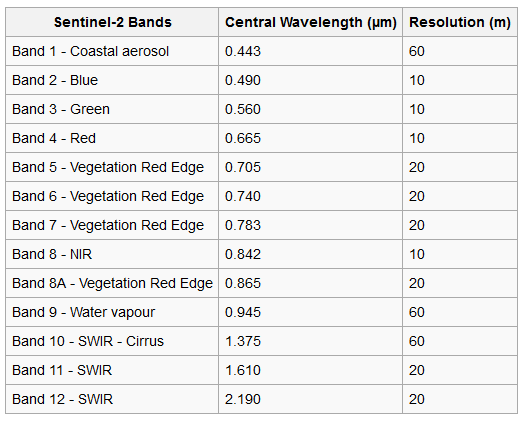

In [21]:
!ls 'BF_CliP_Tiff' 

B08_Clip.tfw	      B08_Clip.tif.ovr	B3_Clip.tif.aux.xml
B08_Clip.tif	      B3_Clip.tfw	B3_Clip.tif.ovr
B08_Clip.tif.aux.xml  B3_Clip.tif	NDWI_before_flood_Clip.tiff


In [22]:
with rio.open('BF_CliP_Tiff/B3_Clip.tif') as f1:
  b3 = f1.read()
with rio.open('BF_CliP_Tiff/B08_Clip.tif') as f2:
  b8 = f2.read()



In [23]:
def show_band(img, title='', size=(6,6), cmap='viridis'):
  # colors = ["g", "yellowgreen",
  #             "peachpuff", "coral", "maroon"]
  # cmap = ListedColormap(colors)
  print(title+' Shape: ', img.shape)
  fig = plt.figure(figsize=size)
  plt.imshow(img.reshape(img.shape[0], img.shape[1]), cmap= cmap)
  plt.axis('off')
  plt.colorbar()
  plt.title(title)
  plt.show()



Green Band(B3) Shape:  (10980, 7391)


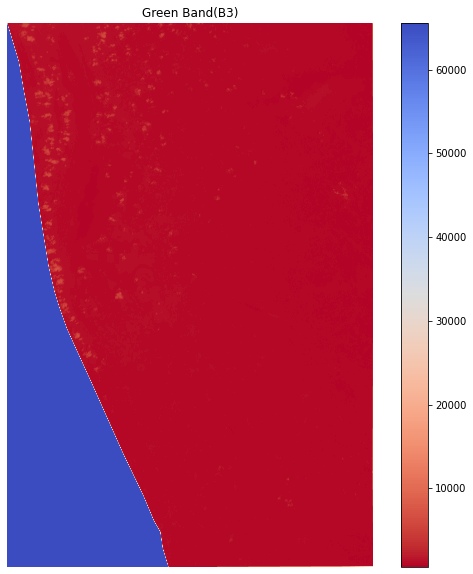

In [24]:
show_band(b3.reshape(b3.shape[1:]), title='Green Band(B3)', size=(10,10), cmap='coolwarm_r')


NIR Band(B8) Shape:  (10980, 7391)


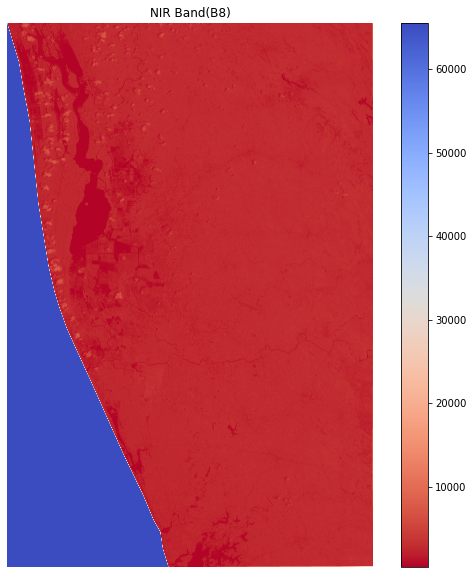

In [25]:
show_band(b8.reshape(b8.shape[1:]), title='NIR Band(B8)', size=(10,10), cmap='coolwarm_r')


 ## Pre Flood - Normalized Difference Water Index (NDWI)

 NDWI = (Green - NIR) / (Green + NIR)

In [26]:
ndwi = (b3.astype(float)-b8.astype(float))/(b3+b8)

NDWI Before Floods Shape:  (10980, 7391)


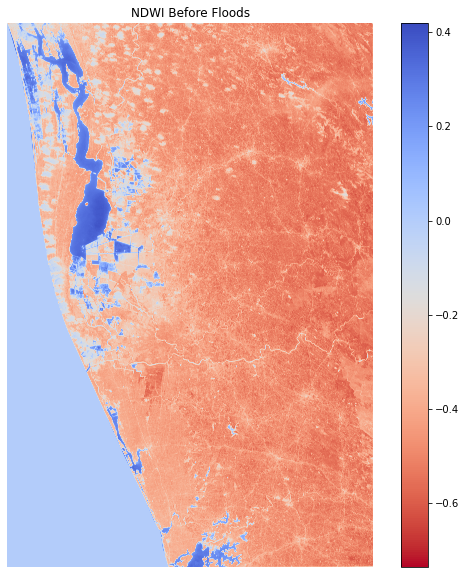

In [27]:
show_band(ndwi.reshape(ndwi.shape[1:]), title='NDWI Before Floods', size=(10,10), cmap='coolwarm_r')

## Save NDWI as tiff file

In [ ]:
# meta = b8.meta
# meta.update(driver='GTiff')
# meta.update(dtype=rio.float32)
# with rio.open('Before Flood_sentinel/NDWI_before_flood_Clip.tiff', 'w', **meta) as dst:
#      dst.write(reshape_as_raster(ndwi.astype(rio.float32)))
with rio.open('BF_CliP_Tiff/NDWI_before_flood_Clip.tiff', 'w', driver='GTiff', dtype=rio.float32, width= ndwi.shape[2] , height = ndwi.shape[1], count=1) as dst:
     dst.write(ndwi.astype(rio.float32))

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:235: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


In [28]:
# Read the saved 
ndwi_raster = rio.open('BF_CliP_Tiff/NDWI_before_flood_Clip.tiff')

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


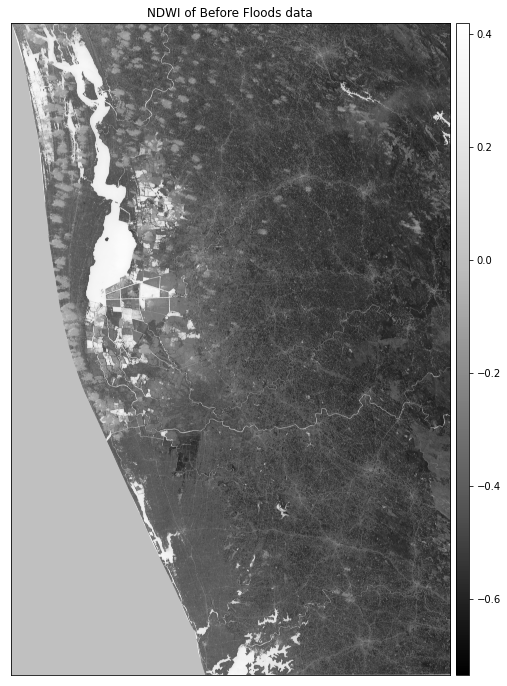

In [29]:
ep.plot_bands(ndwi_raster.read(), title='NDWI of Before Floods data')

## Post Flood

In [30]:
with rio.open('AF_CliP_Tiff/T43PFL_20180911T050649_B03_Clip.tif') as f1_af:
  b3_af = f1_af.read()
with rio.open('AF_CliP_Tiff/T43PFL_20180911T050649_B08_Clip.tif') as f2_af:
  b8_af = f2_af.read()

Green Band(B3) After Floods Shape:  (10980, 7391)


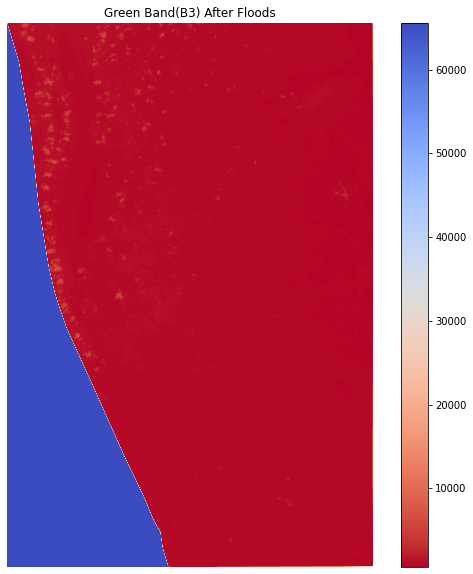

NIR Band(B8) After Floods Shape:  (10980, 7391)


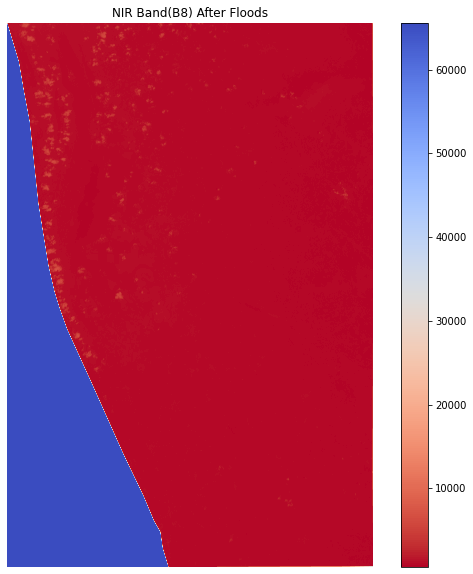

In [31]:
show_band(b3.reshape(b3_af.shape[1:]), title='Green Band(B3) After Floods', size=(10,10), cmap='coolwarm_r')
show_band(b3.reshape(b8_af.shape[1:]), title='NIR Band(B8) After Floods', size=(10,10), cmap='coolwarm_r')

In [32]:
ndwi1 = (b3_af.astype(float)-b8_af.astype(float))/(b3_af+b8_af)

NDWI After Floods Shape:  (10980, 7391)


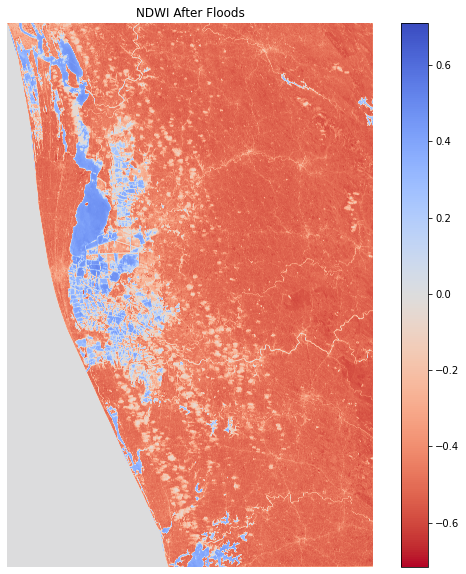

In [33]:
show_band(ndwi1.reshape(ndwi.shape[1:]), title='NDWI After Floods', size=(10,10), cmap='coolwarm_r')

In [ ]:
with rio.open('AF_CliP_Tiff/NDWI_After_flood_Clip.tiff', 'w', driver='GTiff', dtype=rio.float32, width= ndwi.shape[2] , height = ndwi.shape[1], count=1) as dst_1:
     dst_1.write(ndwi1.astype(rio.float32))

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:235: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


In [34]:
# Read the saved 
ndwi_raster_1 = rio.open('AF_CliP_Tiff/NDWI_After_flood_Clip.tiff')

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


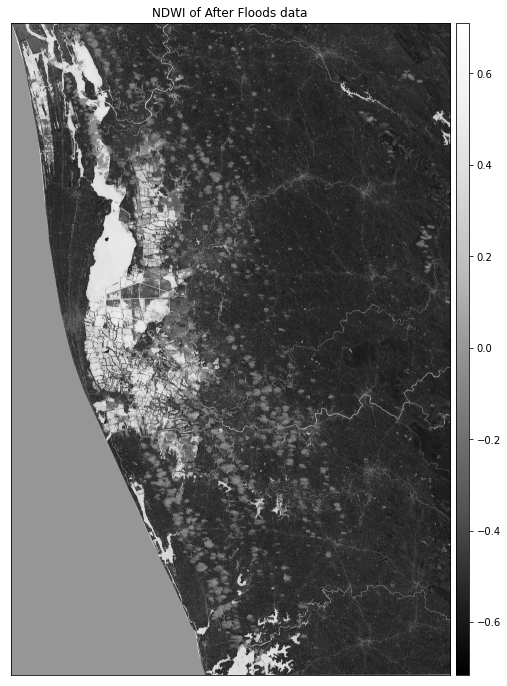

In [35]:
ep.plot_bands(ndwi_raster_1.read(), title='NDWI of After Floods data')

## Masking Data

### After Flood NDWI

In [36]:
import numpy as np
mask_af = ndwi1 < 0.0

In [37]:
mask = mask_af.astype(int)

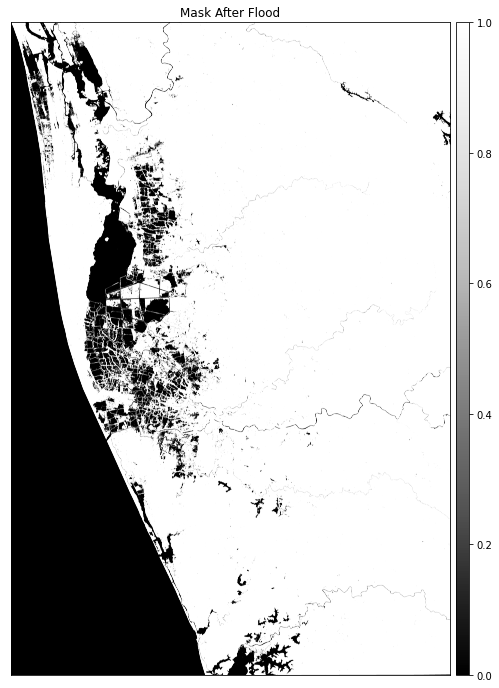

In [38]:
ep.plot_bands(mask_af, title='Mask After Flood')

### Before Flood NDWI

In [39]:
mask = ndwi < 0.0

mask = mask.astype(int)

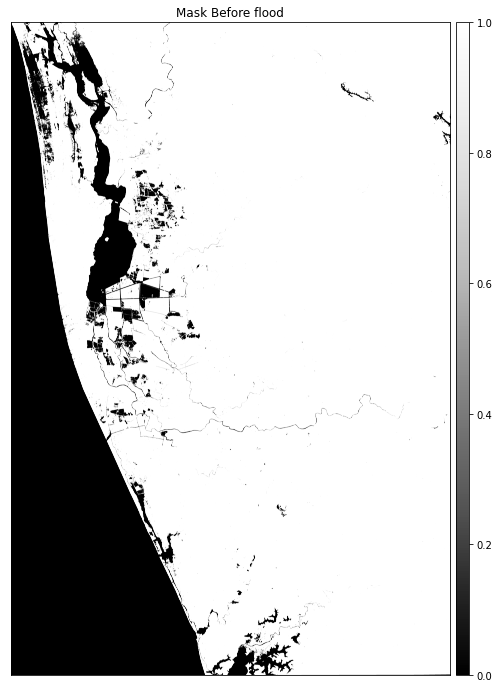

In [40]:
ep.plot_bands(mask, title = 'Mask Before flood')

### Calculating Flood Area

In [41]:
resulted_mask = mask - mask_af

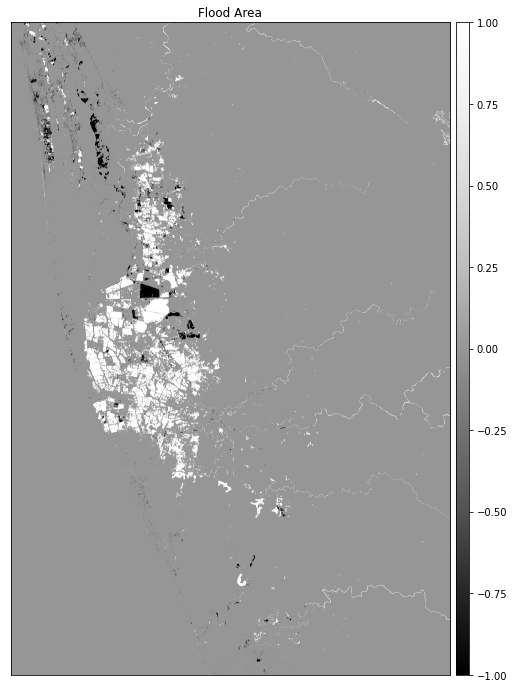

In [42]:
ep.plot_bands(resulted_mask, title='Flood Area')

In [43]:
# replace -1 with 0

resulted_mask[resulted_mask == -1] = 0

# replace values > 0 with 1
resulted_mask[resulted_mask > 0] = 1

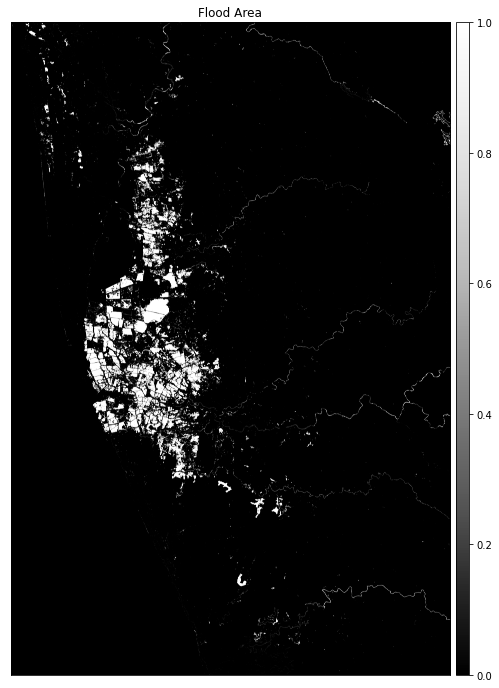

In [44]:
ep.plot_bands(resulted_mask, title='Flood Area')

## Saving Ground Truth

In [47]:
with rio.open('AF_CliP_Tiff/flood_Clip_GT.tiff', 'w', driver='GTiff', dtype=rio.float32, width= resulted_mask.shape[2] , height = resulted_mask.shape[1], count=1) as gt:
     gt.write(resulted_mask.astype(rio.float32))

/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:235: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  **kwargs)


/usr/local/lib/python3.6/dist-packages/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


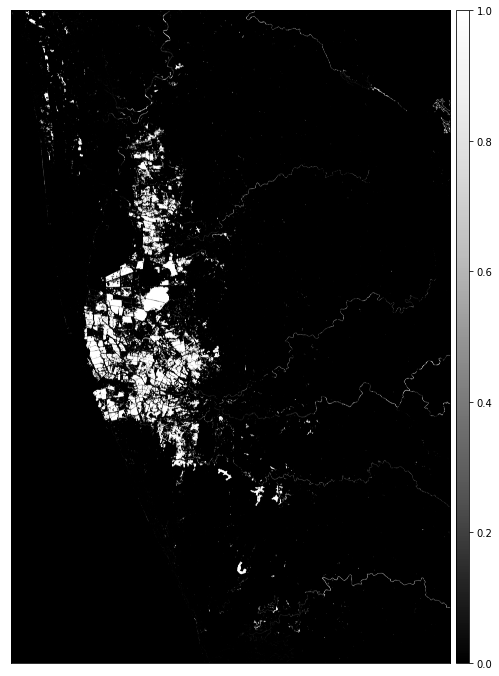

In [48]:
# Read the saved 
gt = rio.open('AF_CliP_Tiff/flood_Clip_GT.tiff').read()

ep.plot_bands(gt)

In [ ]:
# fig = plt.figure(figsize=(10, 10))
# plt.imshow(resulted_mask.reshape(resulted_mask.shape[1:]))
# plt.show()
# plt.imshow(ndwi_af.reshape(ndwi_af.shape[1:]), cmap='coolwarm_r')
# # plt.colorbar()
# plt.axis('off')
# plt.show()
# # np.unique(resulted_mask)

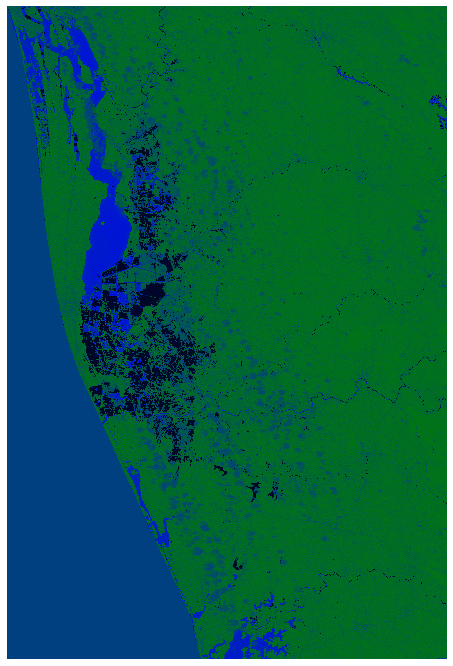

In [ ]:
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# create dummy data
zvals = ndwi1.reshape(ndwi1.shape[1:])
zvals2 = resulted_mask.reshape(resulted_mask.shape[1:])

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()

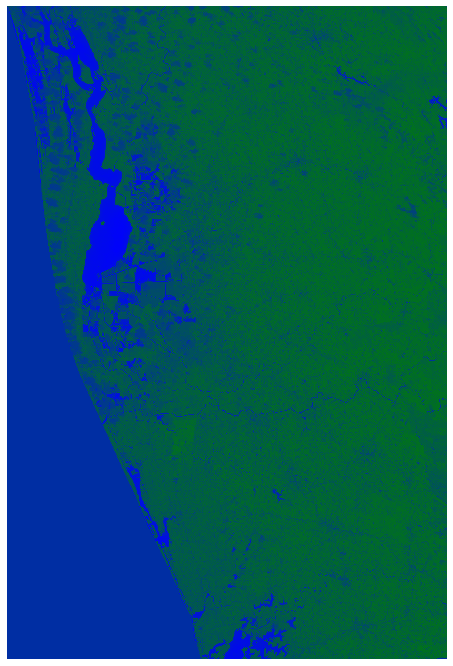

In [ ]:
from matplotlib.colors import colorConverter
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# create dummy data
zvals = ndwi.reshape(ndwi.shape[1:])
zvals2 = np.zeros(resulted_mask.shape[1:])

# generate the colors for your colormap
color1 = colorConverter.to_rgba('white')
color2 = colorConverter.to_rgba('black')

# make the colormaps
cmap1 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap',['green','blue'],256)
cmap2 = mpl.colors.LinearSegmentedColormap.from_list('my_cmap2',[color1,color2],256)

cmap2._init() # create the _lut array, with rgba values

# create your alpha array and fill the colormap with them.
# here it is progressive, but you can create whathever you want
alphas = np.linspace(0, 0.8, cmap2.N+3)
cmap2._lut[:,-1] = alphas

fig = plt.figure(figsize=(12, 12)) 
plt.imshow(zvals, interpolation='nearest', cmap= cmap1, )
plt.imshow(zvals2, interpolation='nearest', cmap=cmap2, label='flood')
# plt.colorbar()
plt.axis('off')

# patches = mpatches.Patch(color=cmap2, label="Flood")
# plt.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
plt.show()